In [ ]:
# Note:
# Questions and theory in markdown cells are taken from The University of Sheffield physics course, 
# my responses are in print statements

# The Heat Equation

## A few theoretical remarks
Heat propagation is described by the differential equation (for a one-dimensional system)
$$\frac{\partial T(x,t)}{\partial t} = \frac{k}{C \rho} \frac{\partial^2 T(x,t)}{\partial x^2},$$
which describes the variation of temperature ($T$) as a function of a coordinate ($x$) and time ($t$).  $k$ is the thermal conductivity, $C$ is the heat capacity and $\rho$ the density of a material.

An analytical solution can be found by separating the variables $x$ and $t$
$$T(x,t)=X(x)\cal{T} (t)$$
Substituting into the original equation, we can rewrite this as two non-coupled ordinary differential equations (ODE) as a function of the $t$ and $x$ variables.
$$\frac{d \cal{T}}{dt} (t) + \alpha^2 \frac{k}{C \rho} {\cal T}(t) = 0, \ \ \ \ \frac{d^2 X}{d x^2}(x) + \alpha^2 X(x)=0,$$
where $\alpha$ is a real number. These are ordinary differential equations, the solutions can be found for set values of $\alpha$. When multiple values of $\alpha$ are allowed, the corresponding solutions need to be added up.

For this project we consider a bar of length $L=0.3$ m with the boundary conditions $T(0,t)=T(L,t)=0$ C, e.g. with the two edges kept at a constant temperature of 0 C. We also assume the initial condition $T(x,0)=T_0=100$C for $0<x<L$. 

The boundary condition requires a solution for $X(x)$ of the type:
$$X(x)=\sin \alpha_n x \ \ \mbox{with} \ \ \alpha_n=n \pi/L$$
Consequently the solution for $\cal{T}(t)$ is written in the form:
$${\cal T}(t)=\exp{\left( -\frac{\alpha_n^2 kt}{C \rho} \right) } $$
Which leads to the generic solution
$$T(x,t) = \sum_{n=1}^{\infty} A_n \sin (\alpha_n x) \exp{\left( -\frac{\alpha_n^2 kt}{C \rho} \right) }, $$

To satisfy the initial condition, we can derive the factors $A_n$ of the Fourier serie and write the analytical solution as
$$T(x,t) = \sum_{n=1, 3, 5, ...}^{\infty} \frac{4T_0}{n \pi} \sin (\alpha_n x) \exp{\left( -\frac{\alpha_n^2 kt}{C \rho} \right) }, $$


In your numerical implementation use Aluminium as a metal with heat conductivity $k=220$ W/(m K), density $\rho=2700$ kg/m$^3$ and specific heat $C=900$ J/(kg K). 




## Question 1: Sum the members of the series
**(8 marks)**

The analytical solution is presented as an infinite serie of terms. Write code to calculate the n-th term of the serie as a function of $x$ and $t$. 
- Plot two graphs, each with the first three terms of the serie (n=1,3,5), for t=0s and t=20s. Comment on the results
- Add the first 50 terms (up to $n=99$) of the serie and plot a graph of $T(x,t)$ for t=0, 20, 100 s. If enough points are used in the $x$ coordinate a ripple is visible in the graph for $t=0$ s. Explain this. 
- Produce a 3D plot showing $T(x,t)$ for t up to 100 s, when adding the first 50 terms. Plot as a wireframe and as a colour temperature map

In [1]:
# Constants and imports.
%matplotlib inline
import numpy as np # Allows us to use numpy functions like linspace and arrays.
import matplotlib.pyplot as plt # Allows us to make plots.
from mpl_toolkits.mplot3d import Axes3D # Allows us to make 3D plots.

L = 0.3
T0 = 100
k = 220
C = 900
rho = 2700
tlist = [0, 20, 100]
nlist = np.linspace(1, 99, 50)
maxt = 100

When enough x points are used a ripple is seen in the t = 0 graph of the summed n terms. This is because of the sin term in the fourier sum becoming more visible when you increase the effective x resolution by increasing the number of x points. Conversely increasing the number of n terms will make the ripple less visible as the graph tends more towards a top-hat.


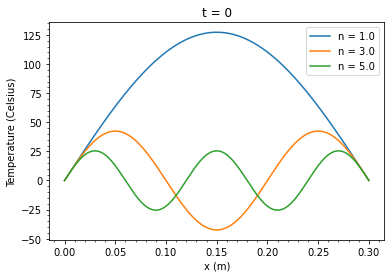

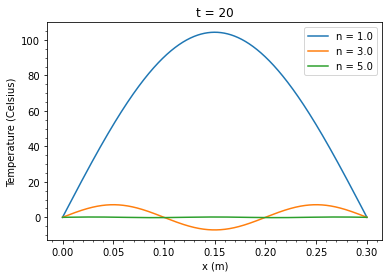

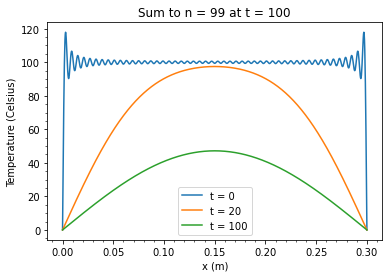

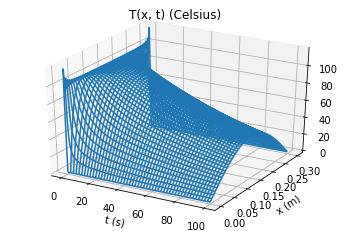

In [2]:
def nth(x, t, n, L, T0, k, C, rho):
    alph = (n * np.pi) / L
    return ((4 * T0) / (n * np.pi)) * np.sin(alph * x) * np.exp(-((alph ** 2) * k * t)/ (C * rho))

def temperature(x, t, nlist, L, T0, k, C, rho):
    sumT = 0
    for n in nlist:
        sumT += nth(x, t, n, L, T0, k, C, rho)
    return sumT

def analytgraphs(tlist, nlist):
    xlist = np.linspace(0, L, 1000)
    ts = np.linspace(0, maxt, 1000)
    xa, ta = np.meshgrid(xlist, ts)
    
    for i in tlist[:2]: # Loops over all the t values.
        plt.figure() # Opens a new figure.
        tlabel = str(i) # Generates a string of the t value for the figure titles.
        for n in nlist[:3]: # Loops over all the n values.
            nlabel = str(n) # Generates a string of the n value for the legend labels.
            T = nth(xlist, i, n, L, T0, k, C, rho) # Calls the nth function on a list of x to generate a list of the temperature at each point.
            plt.plot(xlist, T, label = 'n = ' + nlabel) # Plots temperature against x.
        plt.xlabel('x (m)') # Labels the x axis.
        plt.ylabel('Temperature (Celsius)') # Labels the y axis.
        plt.gca().minorticks_on() # Displays minor ticks on the axes.
        plt.legend() # Adds a legend to the graph based on the 'label=' statements in the lines above.
        plt.title('t = ' + tlabel) # Adds a title to the graph.
    
    plt.figure() # Opens a new figure.
    for i in tlist: # Loops over all the t values.
        sumT = 0 # Initialises the sumT variable as zero.
        tlabel = str(i) # Generates a string of the t value for the figure titles.
        for n in nlist: # Loops over all the n values.
            sumT += nth(xlist, i, n, L, T0, k, C, rho) # Sums the values of the n terms at each x point.
        plt.plot(xlist, sumT, label = 't = ' + tlabel) # Plots temperature against x.
        plt.xlabel('x (m)') # Labels the x axis.
        plt.ylabel('Temperature (Celsius)') # Labels the y axis.
        plt.gca().minorticks_on() # Displays minor ticks on the axes.
        plt.legend() # Adds a legend to the graph based on the 'label=' statements in the lines above.
        plt.title('Sum to n = 99 at t = ' + tlabel) # Adds a title to the graph.

    T = temperature(xa, ta, nlist, L, T0, k, C, rho)
    plt.figure()
    axis=plt.gca(projection='3d')
    axis.plot_wireframe(ta, xa, T)
    plt.xlabel('t (s)') # Labels the y axis.
    plt.ylabel('x (m)') # Labels the x axis.
    plt.title('T(x, t) (Celsius)') # Adds a title to the graph.
    return()
analytgraphs(tlist, nlist)

print('When enough x points are used a ripple is seen in the t = 0 graph of the summed n terms. This is because of the sin term in the fourier sum becoming more visible when you increase the effective x resolution by increasing the number of x points. Conversely increasing the number of n terms will make the ripple less visible as the graph tends more towards a top-hat.')

## Question 2: Numerical solution
**(8 marks) **

A solution can be found numerically using time steps with the so-called "leap frog" method. To do this we replace the derivative in time with the approximation
$$\frac{\partial T(x,t)}{\partial t} = \frac{T(x,t+\Delta t)-T(x,t)}{\Delta t} + ...$$
To approximate the second derivative over $x$ we write
$$T(x+\Delta x,t ) = T(x,t) + \frac{\partial T(x,t)}{\partial x} \Delta x + \frac{1}{2} \frac{\partial^2 T(x,t)}{\partial x^2} (\Delta x)^2+...$$
$$T(x-\Delta x,t ) = T(x,t) - \frac{\partial T(x,t)}{\partial x} \Delta x + \frac{1}{2} \frac{\partial^2 T(x,t)}{\partial x^2} (\Delta x)^2+...$$
Adding the two terms and solving for the second derivative we obtain
$$\frac{\partial^2 T(x,t)}{\partial x^2} = \frac{1}{\Delta x^2} \left[T(x+\Delta x)+T(x-\Delta x)-2T(x,t) \right]$$
Substituting both approximations in the heat equations
$$\frac{T(x,t+\Delta t)-T(x,t)}{\Delta t} = \frac{k}{c \rho} \frac{1}{\Delta x^2} \left[T(x+\Delta x)+T(x-\Delta x)-2T(x,t) \right]$$
By which we get
$$T(x,t+\Delta t)=T(x,t) + \eta \left[ T(x+\Delta x)+T(x-\Delta x)-2T(x,t) \right] \ \ \ , \ \eta=\frac{k \Delta t}{c \rho \Delta x^2} $$
Thus we can evaluate the value of $T(x,t+\Delta t)$ once the value of $T(x,t)$ is known. The numerical method will consist in starting with the given initial condition at $t=0$ and propagate that forward in time, hence the name of "leap frog".

Create a matrix of points $T_{i,j}$ with intervals $\Delta t$ and $\Delta x$ and solve the equation using the leapfrog method:
$$T_{i,j+1}=T_{i,j} + \eta \left[T_{i+1,j}+T_{i-1,j}-2T_{i,j} \right], \ \ \ \eta=\frac{k\Delta t}{C \rho \Delta x^2}$$
Where we have indicated $x=i \Delta x$ and $t=j \Delta t$. For this exercise use $\Delta x=0.01$m and $\Delta t=0.5$s 
- Plot T(x,t) for t=0, 20, 100s and compare with the plot in Exercise 1
- Repeat the 3-D $T(x,t)$ wireframe plot of Exercise 1. 
- Plot the differences between this result and the truncated serie from Exercise 1 for $t=20$ and 100s

(you should use numpy arrays to save the $T_{i,j}$ array as you go along)

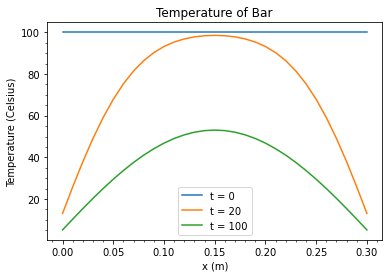

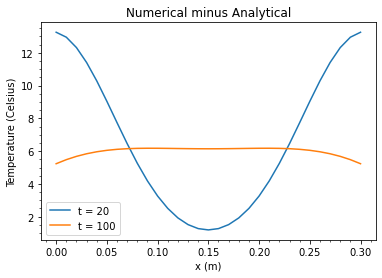

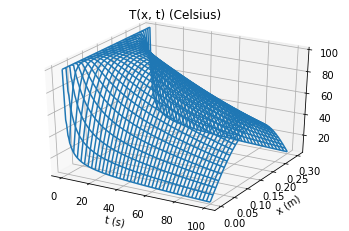

In [3]:
def numerical(delx, delt):
    npos = int(L / delx) + 1
    ntimes = int(maxt / delt) + 1
    Tij = np.zeros((ntimes, npos))
    eta = (k * delt) / (C * rho * (delx ** 2))
    
    for posidx in range(npos):
        Tij[0][posidx] = T0

    for i in range(0, ntimes - 1):
        for j in range(npos):
            if j == 0:
                Tij[i + 1][j] = Tij[i][j] + eta * (Tij[i][j + 1] - (2 * Tij[i][j]))
            elif j == npos - 1:
                Tij[i + 1][j] = Tij[i][j] + eta * (Tij[i][j - 1] - (2 * Tij[i][j]))
            else:
                Tij[i + 1][j] = Tij[i][j] + eta * (Tij[i][j + 1] + Tij[i][j - 1] - (2 * Tij[i][j]))
    return Tij

def numgraphs(delx, delt):
    xs = np.linspace(0, L, int(L / delx) + 1)
    ts = np.linspace(0, maxt, int(maxt /delt) + 1)
    xn, tn = np.meshgrid(xs, ts)
    
    Tij = numerical(delx, delt)
    
    # Graphs of temperature at three time values.
    plt.figure()
    for time in tlist:
        tlabel = str(time) # Generates a string of the t value for the figure titles.
        temp = Tij[int(time / delt)][:]
        plt.plot(xs, temp, label = 't = ' + tlabel)
        plt.xlabel('x (m)') # Labels the x axis.
        plt.ylabel('Temperature (Celsius)') # Labels the y axis.
        plt.gca().minorticks_on() # Displays minor ticks on the axes.
        plt.legend()
        plt.title('Temperature of Bar') # Adds a title to the graph.

    # Graphs of difference between numerical and analytical solutions.
    plt.figure()
    for time in tlist[1:]:
        tlabel = str(time) # Generates a string of the t value for the figure titles.
        temp = Tij[int((time / delt) - 1)][:]
        diff = temp - temperature(xs, time, nlist, L, T0, k, C, rho)
        plt.plot(xs, diff, label = 't = ' + tlabel)
        plt.xlabel('x (m)') # Labels the x axis.
        plt.ylabel('Temperature (Celsius)') # Labels the y axis.
        plt.gca().minorticks_on() # Displays minor ticks on the axes.
        plt.legend()
        plt.title('Numerical minus Analytical') # Adds a title to the graph.

    # 3d Wireframe.
    plt.figure()
    axis=plt.gca(projection='3d')
    axis.plot_wireframe(tn, xn, Tij)
    plt.xlabel('t (s)') # Labels the y axis.
    plt.ylabel('x (m)') # Labels the x axis.
    plt.title('T(x, t) (Celsius)') # Adds a title to the graph.
    return

numgraphs(0.01, 0.5)

## Question 3: Stability study
**(4 marks)**

In this section we evaluate how the quality of our solution depends on the choice of $\Delta x$ and $\Delta t$. 
- Fix $\Delta x = 0.01$ m and change the value of $\Delta t$ to 0.2 s and 1 s. Compare the results with those obtained in exercise 1. 
- Fix $\Delta t = 0.5$ s and change the value of $\Delta x$ to 0.02 m and 0.005 m. Compare the results with those obtained in exercise 1.

When showing your comparisons, plot the difference between the solution in Exercise 2 and what you obtain here.

Next week, I will show you how the solution is expected to be stable only if $\eta < 0.5$. Comment on the results you obtained



In the first three graphs for delta t = 0.2 and delta x = 0.01 (eta = 0.18) we can see that the solution is stable as the graphs are
comparable in shape to the analytical solution in excercise 1. 
The second three graphs show that when delta t = 1  and delta x = 0.01 (eta = 0.91) the solution becomes very unstable.
Graphs seven to nine show a stable solution for delta t = 0.5 and delta x = 0.02 (eta = 0.11) comparable to the analytical soltuion.
Graphs ten to twelve show that the solution has become unstable with delta t = 0.5 and delta x = 0.005 (eta = 1.81).



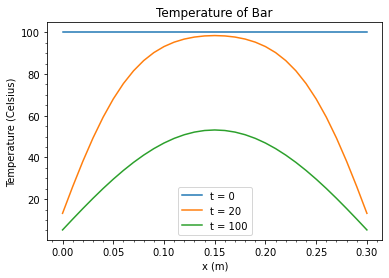

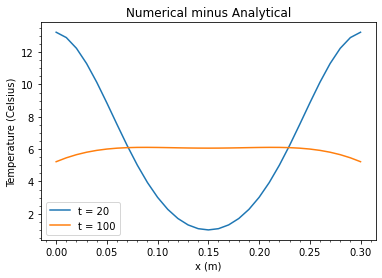

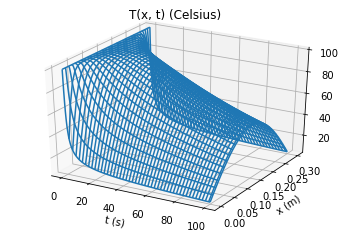

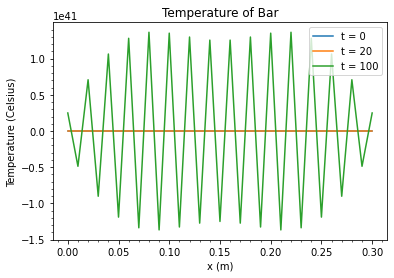

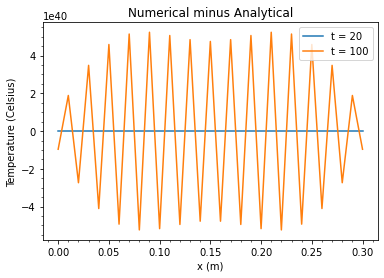

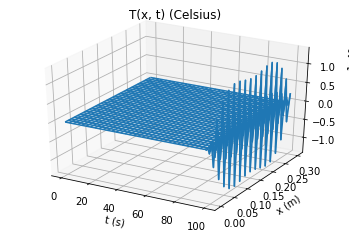

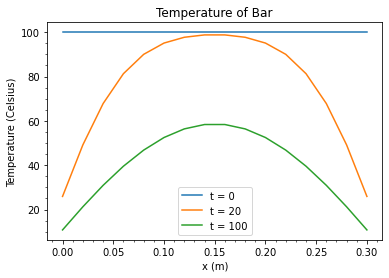

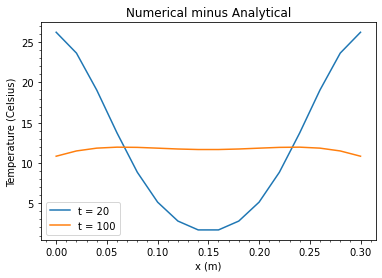

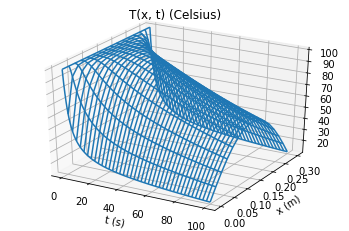

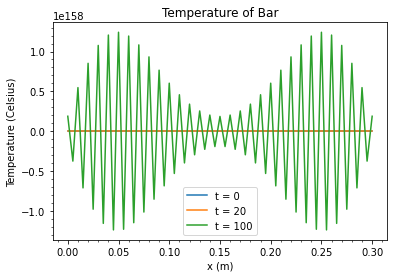

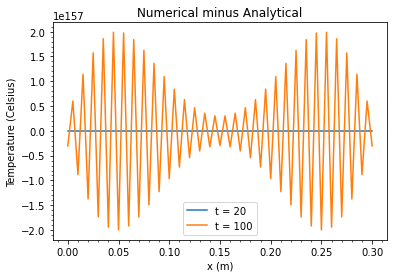

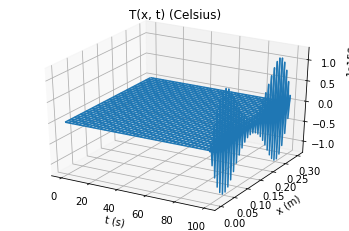

In [4]:
delts = [0.5, 0.2, 1]
delxs = [0.01, 0.02, 0.005]

def stab():
    for delt in delts[1:]:
        numgraphs(delxs[0], delt)
    for delx in delxs[1:]:
        numgraphs(delx, delts[0])
stab()

print("""
In the first three graphs for delta t = 0.2 and delta x = 0.01 (eta = 0.18) we can see that the solution is stable as the graphs are
comparable in shape to the analytical solution in excercise 1. 
The second three graphs show that when delta t = 1  and delta x = 0.01 (eta = 0.91) the solution becomes very unstable.
Graphs seven to nine show a stable solution for delta t = 0.5 and delta x = 0.02 (eta = 0.11) comparable to the analytical soltuion.
Graphs ten to twelve show that the solution has become unstable with delta t = 0.5 and delta x = 0.005 (eta = 1.81).
""")

## Question 4: Sinusoidal initial distribution
**(5 marks)**

A comparison between the numerical solution (via the leap-frog method) and analytical solution (truncated series) is difficult, as it is difficult to estabilish the approximations made for both of them. To gain better numerical insight on the numerical solutions, we repeat the simulations for a case where the exact solution is known, eg the case when the initial condition is given by
$$T(x,0)=T_0 \sin (\pi x/L)$$
In this case only the first term of the serie will be different from zero and the analytical solution does not involve any summation
$$T(x,t)=T_0 \sin (\pi x/L) \exp{\left( -\frac{\pi^2 kt}{L^2 C \rho} \right) }$$
- Repeat the numerical solution with this initial condition and compare the results obtained with the leap-frog method and $\Delta t= 0.5$s, $\Delta x$=0.01m


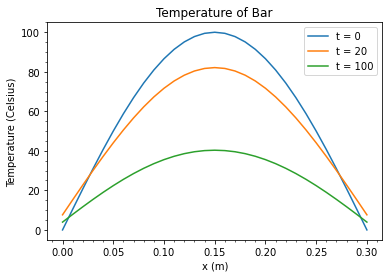

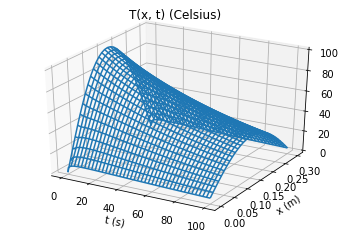

In [5]:
def numerical2(delx, delt):
    npos = int(L / delx) + 1
    ntimes = int(maxt / delt) + 1
    Tij = np.zeros((ntimes, npos))
    eta = (k * delt) / (C * rho * (delx ** 2))
    
    for posidx in range(npos):
        Tij[0][posidx] = T0 * np.sin((np.pi * posidx * delx) / L)

    for i in range(0, ntimes - 1):
        for j in range(npos):
            if j == 0:
                Tij[i + 1][j] = Tij[i][j] + eta * (Tij[i][j + 1] - (2 * Tij[i][j]))
            elif j == npos - 1:
                Tij[i + 1][j] = Tij[i][j] + eta * (Tij[i][j - 1] - (2 * Tij[i][j]))
            else:
                Tij[i + 1][j] = Tij[i][j] + eta * (Tij[i][j + 1] + Tij[i][j - 1] - (2 * Tij[i][j]))
    return Tij

def numgraphs2(delx, delt):
    xs = np.linspace(0, L, int(L / delx) + 1)
    ts = np.linspace(0, maxt, int(maxt /delt) + 1)
    xn, tn = np.meshgrid(xs, ts)
    
    Tij = numerical2(delx, delt)
    
    # Graphs of temperature at three time values.
    plt.figure()
    for time in tlist:
        tlabel = str(time) # Generates a string of the t value for the figure titles.
        temp = Tij[int(time / delt)][:]
        plt.plot(xs, temp, label = 't = ' + tlabel)
        plt.xlabel('x (m)') # Labels the x axis.
        plt.ylabel('Temperature (Celsius)') # Labels the y axis.
        plt.gca().minorticks_on() # Displays minor ticks on the axes.
        plt.legend()
        plt.title('Temperature of Bar') # Adds a title to the graph.

    # 3d Wireframe.
    plt.figure()
    axis=plt.gca(projection='3d')
    axis.plot_wireframe(tn, xn, Tij)
    plt.xlabel('t (s)') # Labels the y axis.
    plt.ylabel('x (m)') # Labels the x axis.
    plt.title('T(x, t) (Celsius)') # Adds a title to the graph.
    return

numgraphs2(0.01, 0.5)

## Project 1. Addendum
A few comments on the first projects after the first week. I add this comments on a separate notebook to avoid redistributing a new one. 
### Corrections to the script
These should have been sent to you in a revised version of the script sent last week. Please note:
- In Exercise 3, you should compare the results you obtain here with the analytical sum from Exercise 1. This means that, together with Exercise 2, you will have 3 different values of $\Delta t$ for the first point and three values of $\Delta x$ for the second point
- There was a typo in the formula of Exercise 4. Clearly the formulae should have $\pi x / L$

### On the use of temperatures
The Project is based on temperatures in Celsius, with the edges kept at T=0C and the bar initial temperature being 100C. This may sound a bit strange, if we were to use temperatures in Kelvin, we should then consider the edges at T=273K and the initial condition being 373K. 

To be able to treat the problem mathematically and to take advantage of the fact that both edges are kept at the same temperature, we should define a new variable $T'=T-273$, which is in effect the temperature in degree Celsius. In other words the use of Celsius rather than Kelvin is a simple way to deal with edges at a fixed temperature

### Stability calculations
When you do Exercise 3, you notice that the difference between the analytical solution and the leap frog solution exhibits wild fluctuations when the leap frog solution does not converge. When that happens the solution is not stable. To assess the value of the parameter for which we obtain a stable solution, we assume that the difference has eigenmodes:
$$T_{m,j}=\xi(\lambda)^j \exp \left( {i \frac{2\pi}{\lambda} m \Delta x } \right)$$
Where we use $i$ as the imaginary constant and $T_{m,j}$ refers to the temperature at time $j \Delta t$ for the point $m \Delta x$. 

This formula tells us that any eigenmode in the difference gets amplified or damped at every iteration by a factor $\xi$, which depends on the wavelength $\lambda$ of the mode. Replacing the equation above into the formula used for the leap-frog method we obtain:
$$\xi(\lambda)^{j+1} \exp \left(i \frac{2\pi}{\lambda} m \Delta x \right) = \xi(\lambda)^{j} \exp \left(i \frac{2\pi}{\lambda} m \Delta x  \right)+ \eta \left[  \exp \left(i \frac{2\pi}{\lambda} (m+1) \Delta x  \right)  + \exp \left(i \frac{2\pi}{\lambda} (m-1) \Delta x  \right) -2 \exp \left(i \frac{2\pi}{\lambda} m \Delta x  \right)   \right]$$

Dividing both sides of the equation by $ \xi(\lambda)^{j} \exp \left(i \frac{2\pi}{\lambda} m \Delta x \right)$ we obtain:
$$\xi(\lambda) = 1 + 2 \eta \left[ \cos \left( \frac{2\pi}{\lambda} m \Delta x  \right) -1 \right] $$
If the quantity $|\xi|<1$ for any value of $x

### General reference
This project was inspired by Chapter 14 of the book "Computational Physics" by Laundau, Paez and Bordeianu published by Wiley. There should be a few copies available in the library.